<a href="https://colab.research.google.com/github/Salma-Jamal/Machine-Learning-and-Statistical-Analysis/blob/main/Assignment04/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://cdn.discordapp.com/attachments/778630432878362676/918826049264025680/Assignment_4_Fisher.rar

In [ ]:
!unrar x '/content/Assignment_4_Fisher.rar'

# Assignment 4: Fisher Implementation

<font color=blue><b>1- Import Needed Packages</b></font>

In [ ]:
import numpy as np
import os
import imageio
import matplotlib.pylab as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt  
import glob

### Get the current directory path

In [ ]:
home_path = os.getcwd()


<font color=blue><b>2- Load Images </b></font>

In [ ]:
Images = glob.glob('/content/Assignment 4 Fisher/Train/*.jpg')
Images = [ i.split('Train/')[1] for i in Images ]

In [ ]:
print(type(Images)) # How Does it store

<class 'list'>


In [ ]:
print(len(Images)) # To know number of them

2400


In [ ]:
Images = sorted(Images)
print(Images)

['1.jpg', '10.jpg', '100.jpg', '1000.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1004.jpg', '1005.jpg', '1006.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1015.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1027.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1035.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1042.jpg', '1043.jpg', '1044.jpg', '1045.jpg', '1046.jpg', '1047.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1054.jpg', '1055.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '106.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1065.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1070.jpg', '1071.jpg', '1072.jpg', '1073.jpg', '107

In [ ]:
train_labels=np.loadtxt('/content/Assignment 4 Fisher/Train/Training Labels.txt')
print(train_labels)
print(len(Images))

[0. 0. 0. ... 9. 9. 9.]
2400


<font color=blue><b>3-Sort them and read them </b></font>

In [ ]:
%matplotlib inline
Images1=sorted(Images, key=lambda t: int(os.path.splitext(t)[0])) # sort them ascendingly 
ImagF=np.zeros((2400,784))  # All Images
for i in range(len(Images)):
    ImagF1=imageio.imread('/content/Assignment 4 Fisher/Train/'+Images1[i])
    ImagF[i,:]=ImagF1.reshape((1,784))

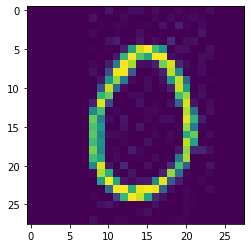

In [ ]:
plt.imshow(ImagF[23,:].reshape(28,28))

<font color=blue ><b>4-Training Phase (Weights) </b></font> 

In [ ]:
def m1(c1):
  #Calculate mean of the intended class
  pixels = [ list() for i in range(784)]
  for image in c1:
    for pixel in range(len(image)):
      pixels[pixel].append(image[pixel])
  pixels_1 = [sum(i)/len(c1) for i in pixels]
  m1 = np.array(pixels_1) 
  return m1
  
def m2(c2):
  #Calculate mean of the other classes
  pixels = [ list() for i in range(784)]
  for image in c2:
    for pixel in range(len(image)):
      pixels[pixel].append(image[pixel])
  pixels_1 = [sum(i)/len(c2) for i in pixels]
  m2 = np.array(pixels_1) 
  return m2 

In [ ]:
def S1(c1,m1):  
  count = 0
  for image in c1:
    image_new = []
    for pixel in range(len(image)):
      image_pixel = image[pixel] - m1[pixel]
      image_new.append(image_pixel)

    image_new = np.array(image_new)
    image_new = image_new.reshape(784,1)
    image_dot = np.dot(image_new,image_new.T)
    if count == 0:
      images_vector = image_dot
    else:
      images_vector = images_vector + image_dot
    count+=1
  S1_t = images_vector
  return S1_t 

def S2(c2,m2):      
  count = 0
  for image in c2:
    image_new = []
    for pixel in range(len(image)):
      image_pixel = image[pixel] - m2[pixel]
      image_new.append(image_pixel)

    image_new = np.array(image_new)
    image_new = image_new.reshape(784,1)
    image_dot = np.dot(image_new,image_new.T)
    if count == 0:
      images_vector = image_dot
    else:
      images_vector = images_vector + image_dot
    count+=1
  S2_t = images_vector
  return S2_t

In [ ]:
def plot_conf_mat(Test_Labels,Predicted_Labels):
  unique_labels = ['0', '1','2','3','4','5','6','7','8','9']
  cm = confusion_matrix(Test_Labels, Predicted_Labels ,labels=np.unique(Test_Labels))
  fig, ax = plt.subplots(figsize=(15,15)) 
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax); 
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix')
  ax.xaxis.set_ticklabels(unique_labels)
  ax.yaxis.set_ticklabels(unique_labels)

In [ ]:
W=np.zeros((10,784))
W_o=np.zeros((10,1))
counter=0 
for i in range(0,len(Images1),240):
    
    #Get First Class say c1
    c1 = ImagF[i:i+240]

    #Get Other Classes say c2
    c2 = list(ImagF)
    del c2[i:i+240]
    c2 = np.array(c2)

    #Get Means
    mean1=m1(c1)
    mean2=m2(c2)
    
    #Calculate SW
    Sw= S1(c1,mean1) + S2(c2,mean2)
    #Calculate its invers "Note Use pinv function"
    Sw_inv= np.linalg.pinv(Sw)

    #Calculate Weigths of the intended class 
    W[counter] = np.dot(Sw_inv , (mean2 - mean1))
    #Calculate W_bias of it
    W_o[counter] = -0.5 * np.dot(  W[counter].reshape(784,1).T , (mean2 + mean1) )
    
    counter+=1

Accuracy On Test Set =  83.0


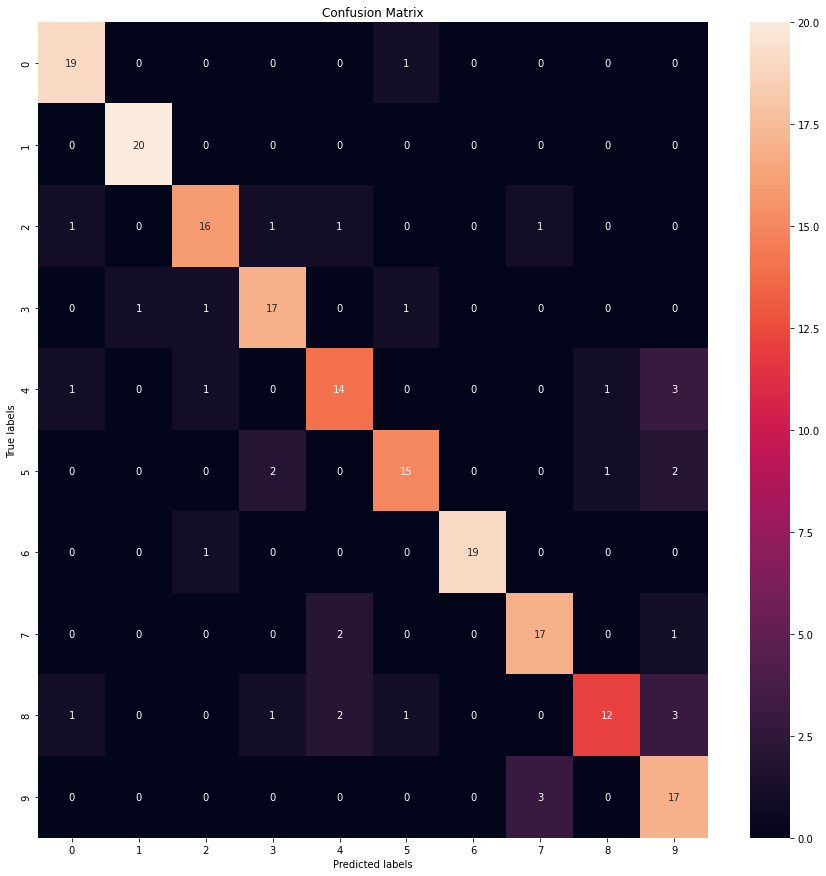

In [ ]:
#-----------------Testing---------------
os.chdir(home_path)
Test_Labels=np.loadtxt("/content/Assignment 4 Fisher/Test/Test Labels.txt")
path='/content/Assignment 4 Fisher/Test'
os.chdir(path)
Test_Image=os.listdir()
Test_Image.remove('Test Labels.txt')
Test_Image1=sorted(Test_Image, key=lambda t: int(os.path.splitext(t)[0]))
Imag_T=np.zeros((200,784))
for i in range(len(Test_Image1)):
    Imag=imageio.imread(Test_Image1[i])
    Imag_T[i,:]=Imag.reshape((1,784)) 
    
Predicted_Y = np.zeros((len(Imag_T), 10))
Predicted_Labels = np.zeros((len(Imag_T)), dtype=int)    


for j in range(len(Imag_T)):
  for i in range(10):
    # Calculate Predicted Y 
    Predicted_Y[j, i] = np.dot(W[i].reshape(784,1).T,  Imag_T[j]) + W_o[i]
  # Calculate Predicted Labels
  Predicted_Labels[j] = np.argmin(Predicted_Y[j])

# Calculate Accuracy and Print it
acc = 0
for i in range(len(Imag_T)):
  if Predicted_Labels[i] == Test_Labels[i]:
    acc+=1
print("Accuracy On Test Set = ",(acc/200)*100)

#Plot Confusion Matrix and save it but take care to save it in another folder NOT TRAIN or TEST
plot_conf_mat(Test_Labels,Predicted_Labels)